Predict the amount of texi

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_row",None)
pd.set_option("display.max_Columns",None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
df=pd.read_csv("TaxiFare.csv")

In [4]:
df.sample(10).style.background_gradient(cmap='Accent')


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2850,19:05.0,4.500000,2014-10-04 21:19:05 UTC,-73.988487,40.764261,-73.987673,40.768005,1
15637,21:00.0,17.700000,2009-05-06 18:21:00 UTC,-73.969148,40.785545,-74.001268,40.725088,5
27614,20:00.0,6.900000,2012-03-02 20:20:00 UTC,-73.981917,40.740683,-73.991797,40.753822,2
48925,47:00.0,5.500000,2013-05-28 21:47:00 UTC,-73.983460,40.773492,-73.982815,40.783400,6
46709,51:00.0,10.000000,2012-09-12 09:51:00 UTC,-73.955975,40.781757,-73.962650,40.804537,2
28051,35:21.0,30.500000,2011-02-24 18:35:21 UTC,-73.863599,40.769808,-73.972035,40.758879,1
3885,43:00.0,16.000000,2014-12-08 02:43:00 UTC,-73.989785,40.756910,-73.937802,40.809717,1
9665,50:00.0,11.000000,2012-12-05 11:50:00 UTC,-73.956412,40.781257,-73.977007,40.775022,3
9547,52:00.0,7.500000,2013-03-27 09:52:00 UTC,-73.989038,40.748137,-73.977443,40.759087,5
43839,27:18.0,26.500000,2009-06-24 03:27:18 UTC,-73.998523,40.719879,-73.939682,40.847419,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.describe().style.background_gradient(cmap='rainbow')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<Axes: >

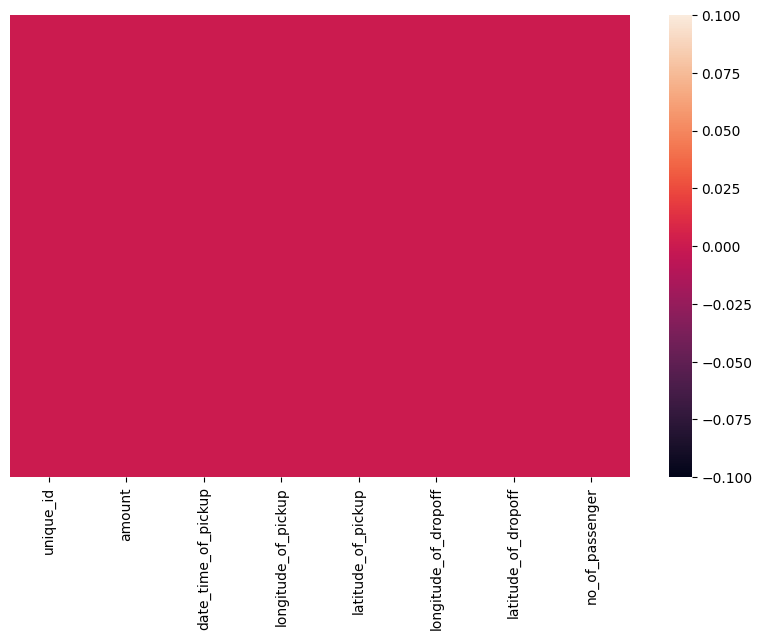

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

**finding distance**

In [11]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    for pos in range(len(longitude1)):
        long1, lati1, long2, lati2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        distance = haversine_distance(lati1, long1, lati2, long2)
        travel_dist.append(distance)
    return travel_dist

# Rest of your code
df['dist_travel_km'] = distance_transform(df['longitude_of_pickup'].to_numpy(),
                                          df['latitude_of_pickup'].to_numpy(),
                                          df['longitude_of_dropoff'].to_numpy(),
                                          df['latitude_of_dropoff'].to_numpy()
                                         )


**Removing outlier**

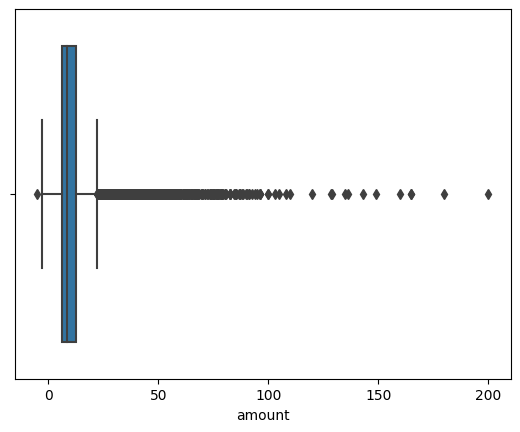

In [12]:
sns.boxplot(x="amount",data=df)
plt.show()

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [14]:
lowAge,uppAge=remove_outlier(df['amount'])
df['amount']=np.where(df['amount']>uppAge,uppAge,df['amount'])
df['amount']=np.where(df['amount']<lowAge,lowAge,df['amount'])

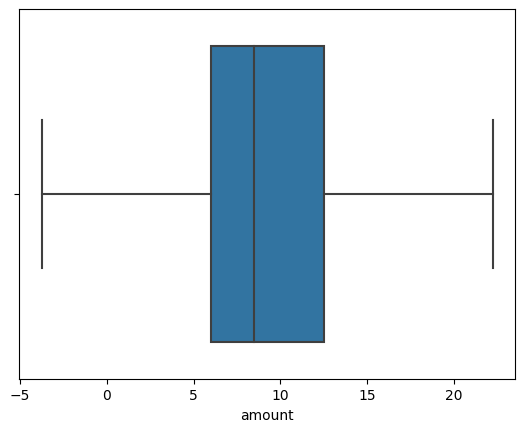

In [15]:
sns.boxplot(x="amount",data=df)
plt.show()

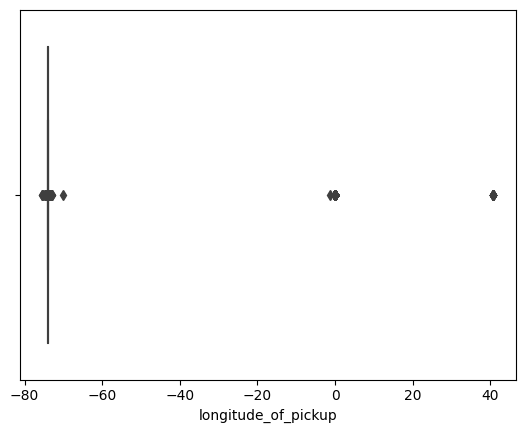

In [16]:
sns.boxplot(x="longitude_of_pickup",data=df)
plt.show()

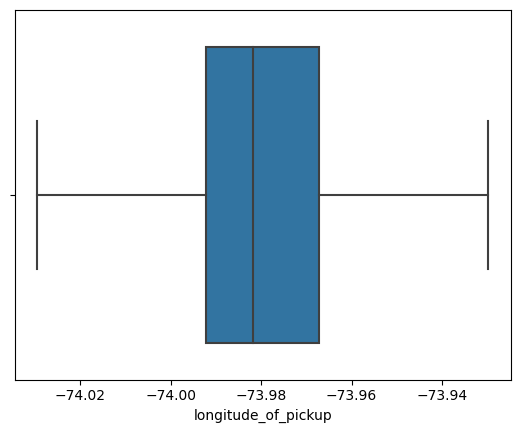

In [17]:
lowAge,uppAge=remove_outlier(df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']>uppAge,uppAge,df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']<lowAge,lowAge,df['longitude_of_pickup'])
sns.boxplot(x="longitude_of_pickup",data=df)
plt.show()

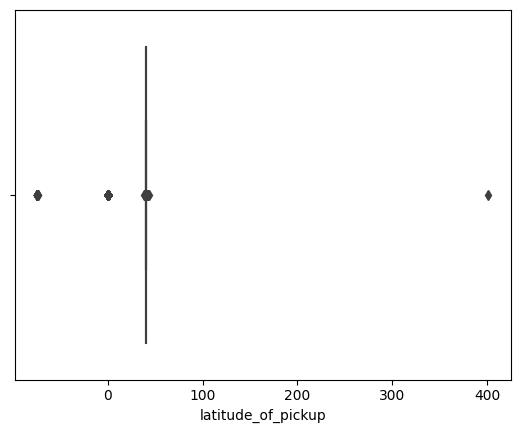

In [18]:
sns.boxplot(x="latitude_of_pickup",data=df)
plt.show()

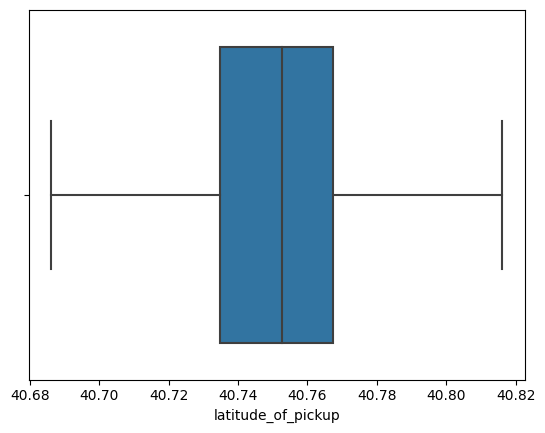

In [19]:
lowAge,uppAge=remove_outlier(df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']>uppAge,uppAge,df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']<lowAge,lowAge,df['latitude_of_pickup'])
sns.boxplot(x="latitude_of_pickup",data=df)
plt.show()

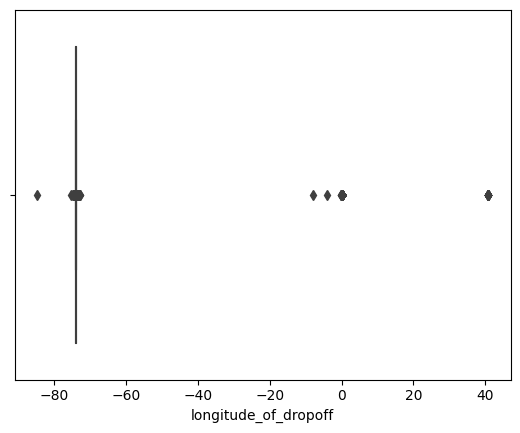

In [20]:
sns.boxplot(x="longitude_of_dropoff",data=df)
plt.show()

In [21]:
lowAge,uppAge=remove_outlier(df['longitude_of_dropoff'])
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']>uppAge,uppAge,df['longitude_of_dropoff'])
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']<lowAge,lowAge,df['longitude_of_dropoff'])


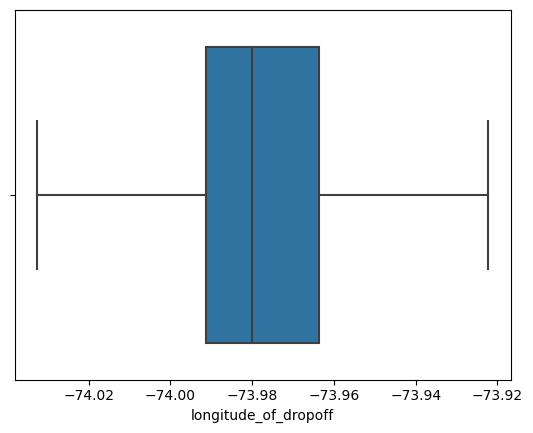

In [22]:
sns.boxplot(x="longitude_of_dropoff",data=df)
plt.show()

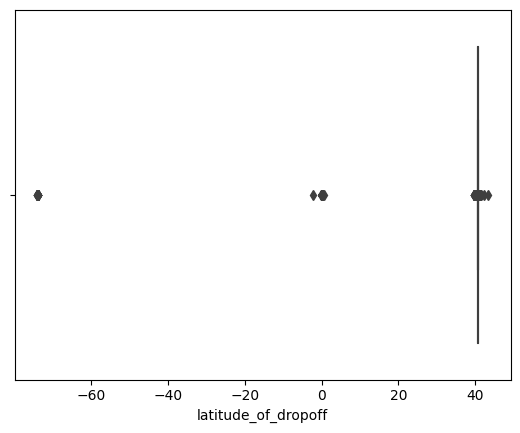

In [23]:
sns.boxplot(x="latitude_of_dropoff",data=df)
plt.show()

In [24]:
lowAge,uppAge=remove_outlier(df['latitude_of_dropoff'])
df['latitude_of_dropoff']=np.where(df['latitude_of_dropoff']>uppAge,uppAge,df['latitude_of_dropoff'])
df['latitude_of_dropoff']=np.where(df['latitude_of_dropoff']<lowAge,lowAge,df['latitude_of_dropoff'])


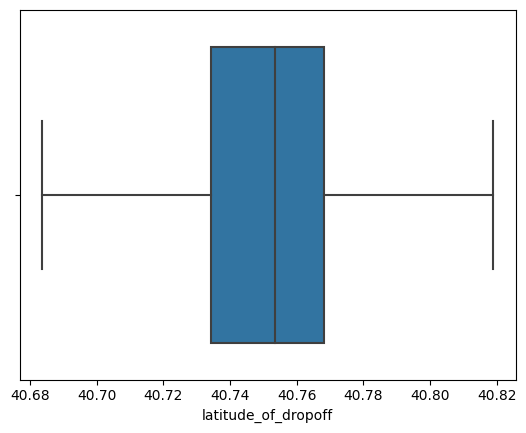

In [25]:
sns.boxplot(x="latitude_of_dropoff",data=df)
plt.show()

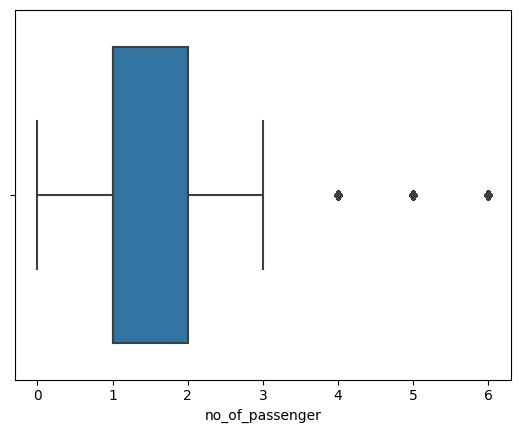

In [26]:
sns.boxplot(x="no_of_passenger",data=df)
plt.show()

In [27]:
lowAge,uppAge=remove_outlier(df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']>uppAge,uppAge,df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']<lowAge,lowAge,df['no_of_passenger'])


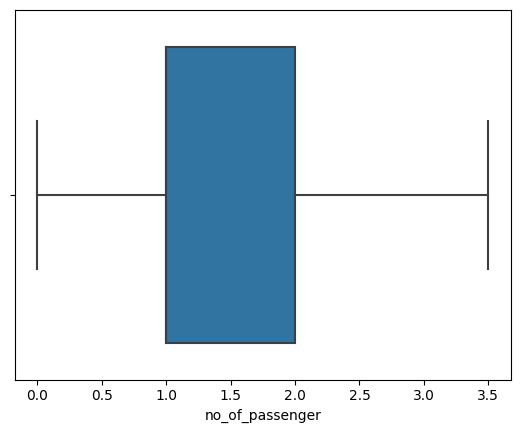

In [28]:
sns.boxplot(x="no_of_passenger",data=df)
plt.show()

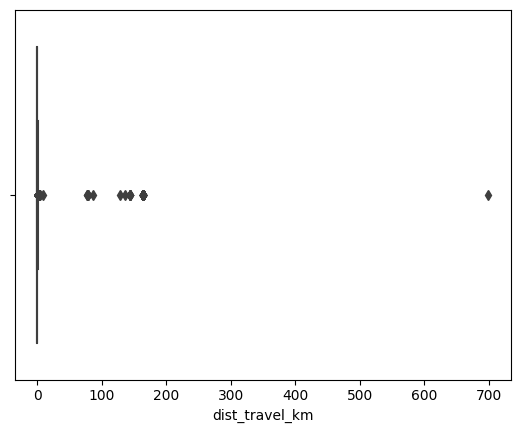

In [29]:
sns.boxplot(x="dist_travel_km",data=df)
plt.show()

In [30]:
lowAge,uppAge=remove_outlier(df['dist_travel_km'])
df['dist_travel_km']=np.where(df['dist_travel_km']>uppAge,uppAge,df['dist_travel_km'])
df['dist_travel_km']=np.where(df['dist_travel_km']<lowAge,lowAge,df['dist_travel_km'])


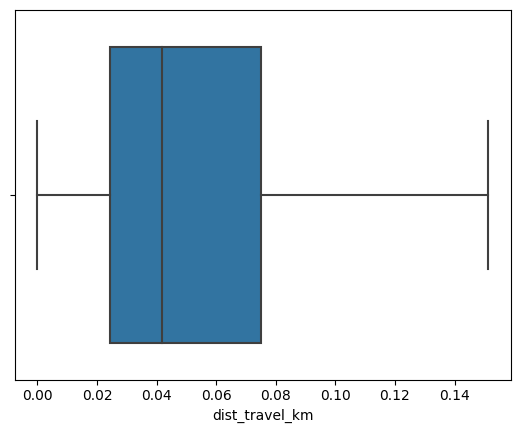

In [31]:
sns.boxplot(x="dist_travel_km",data=df)
plt.show()

**Dropping columns**

In [32]:
df=df.drop(["unique_id","date_time_of_pickup"],axis=1)

In [33]:
df.head(5)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_travel_km
0,4.5,-73.929777,40.721319,-73.922231,40.712278,1.0,0.018312
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,0.151329
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,0.026537
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,0.049179
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,0.037784


In [34]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger         float64
dist_travel_km          float64
dtype: object

**visualization**

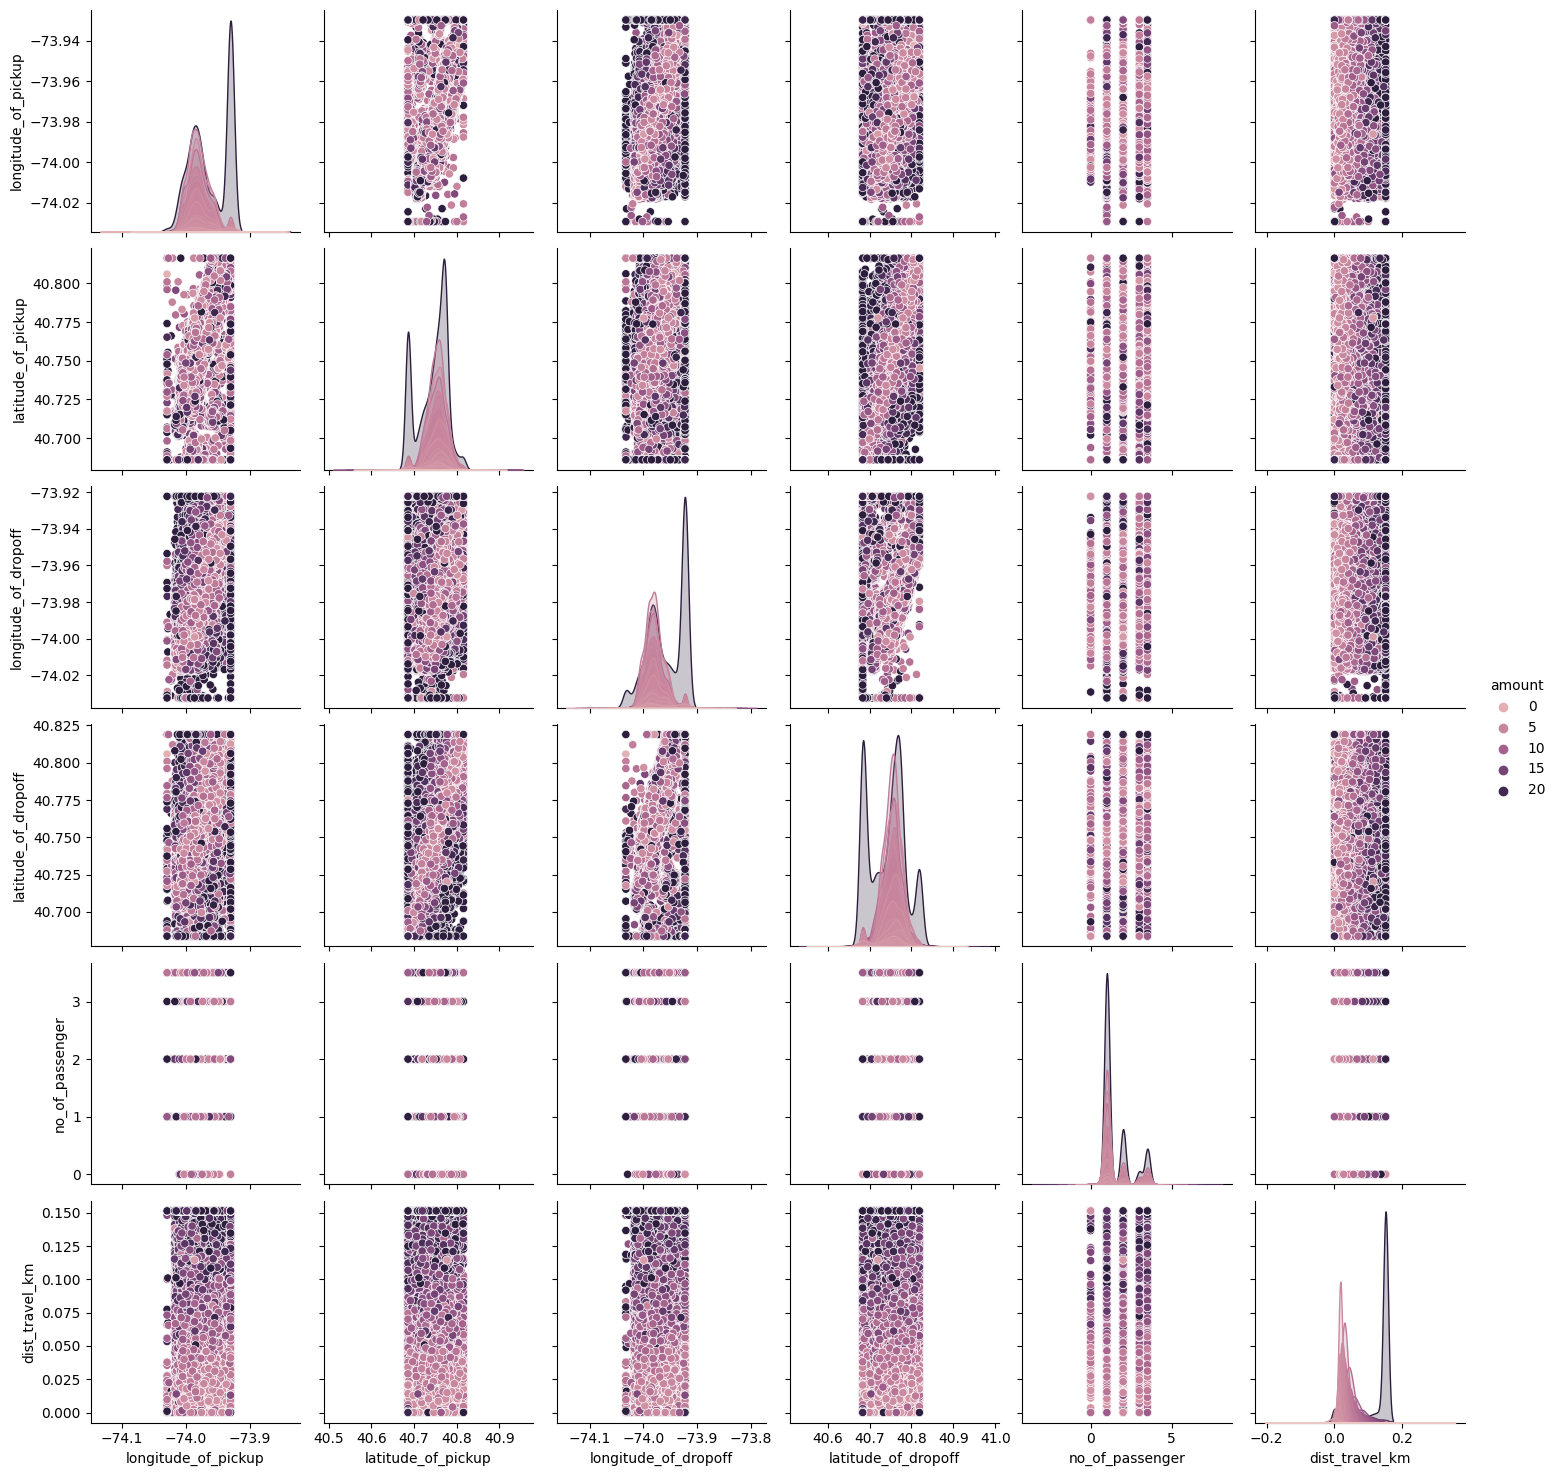

In [35]:
sns.pairplot(df,hue="amount")

**implement machine learning algroithm**

**Linear regressor**

In [36]:
y=df[['amount']]
x=df.drop(['amount'],axis=1)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [38]:
model_lreg = LinearRegression(fit_intercept=True,
    n_jobs=10,
    positive=True

)


In [39]:
model_lreg.fit(x_train,y_train)

LinearRegression(n_jobs=10, positive=True)

In [40]:
model_lreg.score(x_train,y_train)

0.7166090868771122

In [41]:
model_lreg.score(x_test,y_test)

0.7195550520919394

**DecisionTree Regressor**

In [42]:
model_dtr= DecisionTreeRegressor( max_depth=10,max_features=3,random_state=5,max_leaf_nodes=20)

In [43]:
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features=3, max_leaf_nodes=20,
                      random_state=5)

In [44]:
model_dtr.score(x_train,y_train)

0.7420081407646365

In [45]:
model_dtr.score(x_test,y_test)

0.7332869366179999

**Bagging Regressor**

In [46]:
model_baggr=BaggingRegressor( base_estimator=model_dtr)

In [47]:
model_baggr.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                      max_features=3,
                                                      max_leaf_nodes=20,
                                                      random_state=5))

In [48]:
model_baggr.score(x_train,y_train)

0.7557523563197589

In [49]:
model_baggr.score(x_test,y_test)

0.7490010372969205

**Adboost Regressor**

In [50]:
model_adbr=AdaBoostRegressor(random_state=2,base_estimator=model_baggr)

In [51]:
model_adbr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                                                       max_features=3,
                                                                                       max_leaf_nodes=20,
                                                                                       random_state=5)),
                  random_state=2)

In [52]:
model_adbr.score(x_train,y_train)

0.6885528164363441

In [53]:
model_adbr.score(x_test,y_test)

0.6705188477384082

**GradientBostringRegssor**

In [54]:
model_gbr=GradientBoostingRegressor()

In [55]:
model_gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [56]:
model_gbr.score(x_train,y_train)

0.7739876982789957

In [57]:
model_gbr.score(x_test,y_test)

0.7624693177616817

**Random Forest Regressor**

In [58]:
model_rfr=RandomForestRegressor(n_estimators=100, max_depth=9)

In [59]:
model_rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=9)

In [60]:
model_rfr.score(x_train,y_train)

0.8027613778886812

In [61]:
model_rfr.score(x_test,y_test)

0.7635740638200939

**SupportVesctorRegressor(SVR)**

In [62]:
model_svr=SVR(kernel='linear')

In [63]:
model_svr.fit(x_train,y_train)

SVR(kernel='linear')

In [64]:
model_svr.score(x_train,y_train)

0.7197256124253819

In [65]:
model_svr.score(x_test,y_test)

0.7213099136599076